<a href="https://colab.research.google.com/github/AlexanderVieira/DataScience/blob/main/classificacao_exploracao_textos_financeiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação e exploração de textos financeiros

- Base de dados: https://www.kaggle.com/yash612/stockmarket-sentiment-dataset
- Equbot: https://equbot.com/

## Importação das bibliotecas

In [ ]:
import spacy
spacy.__version__

'2.2.4'

In [ ]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import re

## Carregamento da base de dados

In [ ]:
base = pd.read_csv('/content/stock_data.csv')

In [ ]:
base.shape

(5791, 2)

In [ ]:
base.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [ ]:
base.tail()

,Text,Sentiment
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1
5790,"#Sensex, #Nifty climb off day's highs, still u...",1


In [ ]:
np.unique(base['Sentiment'], return_counts=True)

(array([-1,  1]), array([2106, 3685]))

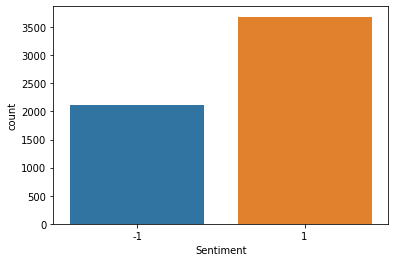

In [ ]:
sns.countplot(x = base['Sentiment']);

In [ ]:
base.isnull().sum()

Text         0
Sentiment    0
dtype: int64

## Função para pré-processamento dos textos

In [ ]:
!python -m spacy download pt

In [ ]:
spacy.load('pt')

In [ ]:
print(spacy.lang.pt.stop_words.STOP_WORDS)

{'vossa', 'cima', 'aqui', 'dá', 'comprido', 'nova', 'vem', 'após', 'novas', 'maior', 'meu', 'seu', 'lá', 'cinco', 'agora', 'estive', 'baixo', 'grande', 'era', 'eu', 'isto', 'aquilo', 'talvez', 'pouco', 'possível', 'quinto', 'estás', 'vais', 'números', 'nesse', 'coisa', 'elas', 'novo', 'és', 'nós', 'apontar', 'uns', 'esses', 'oitava', 'fui', 'põe', 'favor', 'contudo', 'oitavo', 'dezasseis', 'vez', 'faz', 'três', 'menor', 'meio', 'como', 'deverá', 'número', 'pode', 'muito', 'doze', 'qual', 'conselho', 'tuas', 'outros', 'nossa', 'está', 'num', 'teve', 'usar', 'entre', 'sois', 'somente', 'um', 'te', 'outras', 'diante', 'nesta', 'poder', 'tivestes', 'pelos', 'acerca', 'ligado', 'certeza', 'pois', 'à', 'comprida', 'nunca', 'cuja', 'sétima', 'irá', 'outra', 'apoio', 'depois', 'fora', 'longe', 'nível', 'saber', 'então', 'nove', 'iniciar', 'aquele', 'onde', 'desde', 'oito', 'devem', 'posso', 'maioria', 'pegar', 'tiveram', 'pelas', 'próprio', 'com', 'boa', 'vosso', 'porém', 'quero', 'segunda', '

In [ ]:
pln = spacy.load('en')
pln

In [ ]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS
print(stop_words)

{'almost', 'why', 'we', 'somehow', 'together', 'one', 'due', 'whereas', 're', 'sometimes', 'become', 'thereafter', 'whole', 'serious', 'across', 'and', 'may', 'get', 'without', 'doing', 'nowhere', 'toward', 'throughout', 'former', 'say', 'still', 'rather', 'herself', 'really', 'bottom', 'anyhow', 'moreover', 'an', 'himself', 'becoming', 'are', 'often', 'besides', '’re', 'yours', 'although', 'neither', 'third', 'against', 'four', 'least', 'elsewhere', 'who', 'during', 'of', 'first', 'me', "'d", 'done', 'there', 'or', 'eight', 'our', 'wherein', 'thence', 'how', 'move', 'down', 'seemed', 'thru', 'now', 'part', 'latter', 'behind', 'sixty', 'along', 'with', 'thus', 'front', 'everyone', 'latterly', 'everywhere', 'anything', 'wherever', 'afterwards', 'very', 'call', 'be', 'three', '’d', 'own', 'the', 'top', 'which', 'not', 'where', 'six', 'until', '‘ve', 'yourselves', 'being', 'through', 'keep', 'anyone', 'seems', 'alone', 'thereupon', 'whom', 'she', 'then', 'onto', 'nobody', 'again', 'even',

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(texto):
  texto = texto.lower()
  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)
  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)
  texto = re.sub(r" +", ' ', texto)

  documento = pln(texto)
  lista = []
  for token in documento:
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [ ]:
preprocessamento('I will @test9&+ buy the https://www.iaexpert.academy Apple stock. 9 8 care. caring! car')

'buy apple stock care care car'

## Pré-processamento da base de dados

### Limpeza dos textos

In [ ]:
base.head(10)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


In [ ]:
base['Text'] = base['Text'].apply(preprocessamento)

In [ ]:
base.head(10)

,Text,Sentiment
0,kicker -PRON- watchlist xide tit soq pnk cpw b...,1
1,user aap movie return fea geed indicator trade...,1
2,user -PRON- afraid short amzn -PRON- look like...,1
3,mnta 12.00,1
4,oi 21.37,1
5,pgnx 3.04,1
6,aap user current downtrend break short term co...,-1
7,monday relative weakness nyx win tie tap ice i...,-1
8,goog ower trend line channel test volume support,1
9,aap watch tomorrow ong entry,1


## Visualização e exploração

### Número médio de caracteres

In [ ]:
base['tamanho'] = base['Text'].apply(len)
base.head()

,Text,Sentiment,tamanho
0,kicker -PRON- watchlist xide tit soq pnk cpw b...,1,81
1,user aap movie return fea geed indicator trade...,1,59
2,user -PRON- afraid short amzn -PRON- look like...,1,89
3,mnta 12.00,1,10
4,oi 21.37,1,8


In [ ]:
base['tamanho'].describe()

count    5791.000000
mean       50.535313
std        24.960696
min         0.000000
25%        31.000000
50%        50.000000
75%        69.000000
max       129.000000
Name: tamanho, dtype: float64

In [ ]:
positivo = base[base['Sentiment'] == 1]

In [ ]:
positivo['tamanho'].describe()

count    3685.000000
mean       49.721031
std        24.948346
min         0.000000
25%        30.000000
50%        48.000000
75%        68.000000
max       129.000000
Name: tamanho, dtype: float64

In [ ]:
negativo = base[base['Sentiment'] == -1]

In [ ]:
negativo['tamanho'].describe()

count    2106.000000
mean       51.960114
std        24.924272
min         2.000000
25%        32.250000
50%        51.000000
75%        71.000000
max       123.000000
Name: tamanho, dtype: float64

### Nuvem de palavras

In [ ]:
textos_positivos = positivo['Text'].tolist()
len(textos_positivos)

3685

In [ ]:
textos_positivos[0:10]

['kicker -PRON- watchlist xide tit soq pnk cpw bpz aj trade method method prev post',
 'user aap movie return fea geed indicator trade year awesome',
 'user -PRON- afraid short amzn -PRON- look like near monopoly ebook infrastructure service',
 'mnta 12.00',
 'oi 21.37',
 'pgnx 3.04',
 'goog ower trend line channel test volume support',
 'aap watch tomorrow ong entry',
 '-PRON- assume fcx open tomorrow 34.25 trigger buy like setup',
 '-PRON- worry -PRON- expect market rally usually exact opposite happen time -PRON- shall soon bac spx jpm']

In [ ]:
textos_positivos_string = ' '.join(textos_positivos)

In [ ]:
textos_positivos_string

"kicker -PRON- watchlist xide tit soq pnk cpw bpz aj trade method method prev post user aap movie return fea geed indicator trade year awesome user -PRON- afraid short amzn -PRON- look like near monopoly ebook infrastructure service mnta 12.00 oi 21.37 pgnx 3.04 goog ower trend line channel test volume support aap watch tomorrow ong entry -PRON- assume fcx open tomorrow 34.25 trigger buy like setup -PRON- worry -PRON- expect market rally usually exact opposite happen time -PRON- shall soon bac spx jpm aap gamco arry haverty apple extremely cheap great video user maykiljil post agree msft higher possibly north momentum come etfc break ma200 resistance solid volume friday ong set ha hit 35.65 mean resume target level .. user gameplan shoot today like trend break c+h break oc weekly trend break july fcx gapping ideal entry look pull open entry user great list particularly like fisv syk buy hold type check free list athx upper trend line ng nice pnf breakout need follow x swing swy float s

In [ ]:
len(textos_positivos_string)

186906

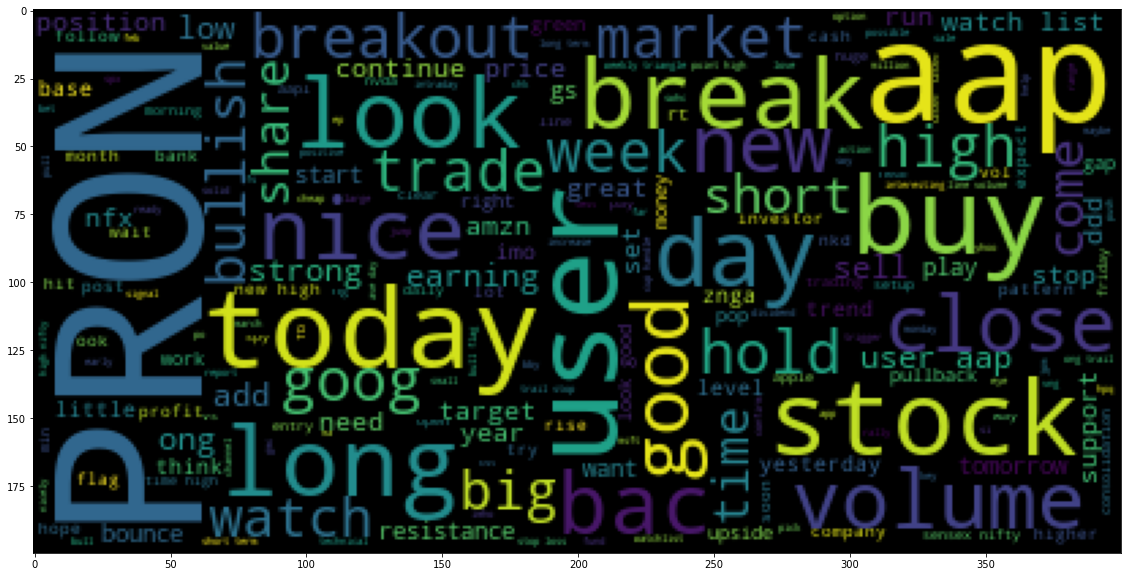

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(textos_positivos_string));

In [ ]:
lista_negativo = negativo['Text'].tolist()
textos_negativos_string = ' '.join(lista_negativo)

In [ ]:
len(textos_negativos_string)

111533

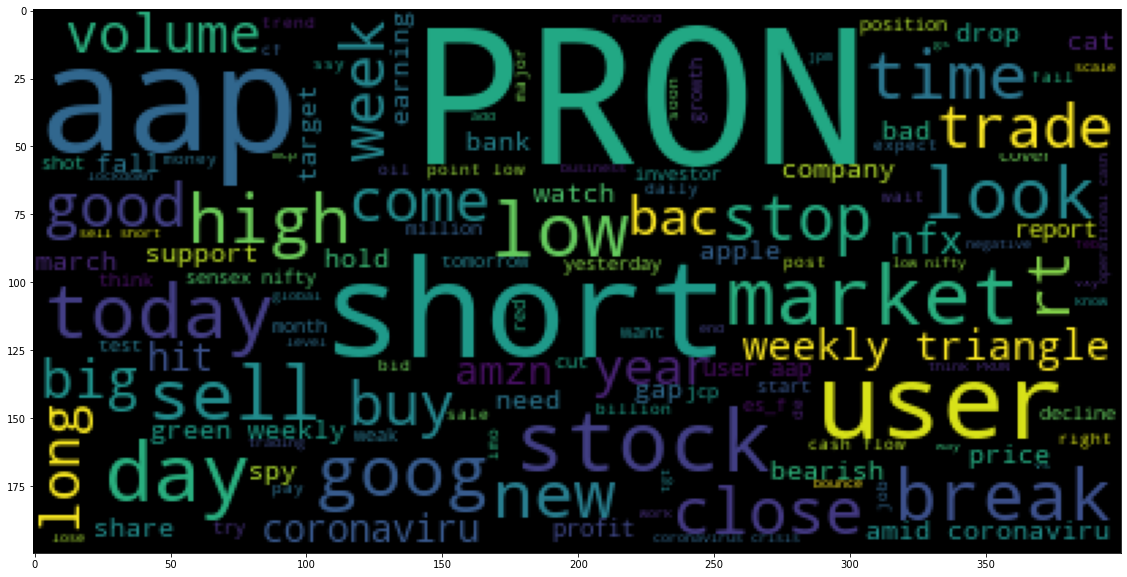

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(textos_negativos_string));

### Extração de entidades nomeadas

- Siglas: https://spacy.io/api/annotation#named-entities

In [ ]:
documento = pln(textos_positivos_string)

In [ ]:
from spacy import displacy
displacy.render(documento, style = 'ent', jupyter = True)

In [ ]:
empresas_positivas = []
for entidade in documento.ents:
  if entidade.label_ == 'ORG':
    print(entidade.text, entidade.label_)
    empresas_positivas.append(entidade.text)

aap ORG
mnta ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
axa ORG
aap ORG
aap ORG
ebay ORG
aap ORG
aap ORG
msft compq new post ORG
aap ORG
ebay ORG
vbd xide ORG
isi aig nice bull ORG
pfe ORG
aap ORG
es_f ORG
spx ORG
huston -PRON- ORG
aap ORG
triangle ORG
fibs ORG
vng huge news patent ORG
vng ORG
gm ORG
vng post nice ORG
oas ORG
mca ORG
aap ORG
aap ORG
ftc ORG
vng ORG
aap ORG
aap ORG
mye ORG
aap ORG
vey ORG
fed ORG
nvda bounce continue stock ORG
rising.obv ORG
ong aapl ORG
amzn daily ORG
sma ORG
sma ORG
aap ORG
axa ORG
aap ORG
aap ORG
aap ORG
ford ORG
ford ORG
pa bank ORG
pick bac c san gs ORG
ceg ORG
aap ORG
ceg ORG
11.50 ORG
triangle ORG
ceg ORG
ceg ORG
avg ORG
aap ORG
aap ORG
obv ORG
aap ORG
avg day ORG
aap ORG
kog ORG
aap ORG
triangle acad ORG
spx +1.90 mo later -PRON- week ORG
sma ORG
voc ORG
aap ORG
aap ORG
intel guess ORG
aap ORG
aap ORG
s&p ORG
aap ORG
bullish cross ORG
obv ORG
aap ORG
aap ORG
aap ORG
triangle ORG
aap ORG
aap ORG
aap ORG
aap ORG
ssys ORG
aap ORG
aap ORG
vey green

In [ ]:
len(empresas_positivas)

1050

In [ ]:
empresas_positivas = set(empresas_positivas)

In [ ]:
len(empresas_positivas)

364

In [ ]:
print(empresas_positivas)

{'hv', 'infi watch', 'vbd xide', 'spx +1.90 mo later -PRON- week', 'ipo company', 'fibs', 'ebay', 'fio', 'samsung disappoint night', 'cgi ove trucking co.', 'jpm comex', 'nvda grow', 'delta', 'oas', 'sma pfe buffet', 'kex', 'msft', 'microsoft', '1.75.watch', 'ma dollar general corporation', 'triangle', 'mdz', 'new york stock exchange', 'coronavirus', 'vxy', 'fri', 'ttmi watch list continuation trade', 'jcc', 'morgan stanley', 'ftc', 'qqq', 'k', '50sma', 'ssys xone nice', 'smith', 'divorce qqq', 'pfe mk tx bac bib', 'cwt', 'opec', 'cgx technica', 'sa', 'evi', 'amzn daily', 'avg', 'osv', 'nfx fs', 'nvda ihs daily', 'mgm', 'ta', 'phoenix reference', '~should', 'marijuana', 'hfc great group', 'nkd', 'nvda avenue', 'min triple doji aap news', 'xrx golden cross', 'golden cross daily', 'mark resistance', 'financial energy pharma', 'til', 'avg day', 'gd', '/t', 'qep', 'amazon', 'vbd', 'intel guess', 'app', 'amtd td ameritrade', 'focus social network', 'ios', 'np', 'bull', 'rising.obv', 'sun ph

In [ ]:
empresas_negativas = []
documento = pln(textos_negativos_string)
for entidade in documento.ents:
  if entidade.label_ == 'ORG':
    print(entidade.text, entidade.label_)
    empresas_negativas.append(entidade.text)

aap ORG
nyx ORG
aap ORG
nkd ORG
phm ORG
coh ORG
bwd ORG
aig american international group ORG
sony ORG
wtw ORG
aap ORG
fed ORG
es_f ORG
aap ORG
aap ORG
aap ORG
obv ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
nvda enko view red dead ORG
sma ORG
aap ORG
triangle ORG
aap ORG
es_f ORG
triangle heo ORG
aap ORG
aap ORG
triangle ktos ORG
skx ORG
triangle ORG
ish jpm 1st ORG
triangle ORG
triangle ORG
triangle ORG
south yum ORG
es_f ORG
fio air ORG
aap ORG
aap ORG
17.90s ORG
ssys ORG
mkt ORG
triangle ctic ORG
clearwire corp ORG
yhoo dec bb&t cm ORG
ssys ORG
aap ORG
triangle depo ORG
triangle fnfg ORG
aap ORG
mgm ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
apple ORG
aap ORG
triangle ORG
triangle hban ORG
triangle hek ORG
spx green ORG
bell ORG
aap ORG
mgm ORG
es spx ORG
bac ORG
aap ORG
aap ORG
mkt ORG
aap ORG
triangle ktos ORG
aap ORG
triangle dn ORG
sma ORG
sma ORG
aap ORG
aap ORG
aap ORG
aap ORG
wsj party ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
triangle ORG
aap ORG
a

In [ ]:
empresas_negativas = set(empresas_negativas)
len(empresas_negativas)

226

In [ ]:
print(empresas_negativas)

{'bwd', 'skx', 'triangle hek', 'nxt', 'triangle hban', 'triangle cytx', 'es_f', 'channel bull flag january', 'dow', 'ngt ecb', 'mkt', 'clearwire corp', 'warner', 'spw', 'mason', 'ngg', 'cie geady south watch', 'banksâ€', 'ssys exuberance stock', 'cnbc', 'si slope low macd cross', 'sa gutte buffett management power', 'gm slam', 'sna gs daily', 'amtd -PRON- cross', 'ge', 'triangle heo', 'spx es_f', 'coronavirus scare', 'u.k foreign exchange company', 'triangle dn', 'british airways', 'house', '4th phone.fed', 'ssys', 'xfl middle promising', 'goldman sachs cut forecast', 'downward macd divergence', 'fiat', 'ma70', 'ebay', 'axdx cmco', 'owe', 'china news', 'cbs', 'oas', 'idc', 'oyo hotels', 'goldman sachs \n  ', 'isg update', 'renault', 'treasury', 'terranova', 'coronavirus crisis fitch', 'foreigner', 'churn', 'nvda enko view red dead', 'sna', 'nfx', 'moody cut', 'msft', 'microsoft', 'comex', 'u.s labor force', 'net inc', 'cboe', 'iâ€', 'yr', 'phm', 'triangle', 'un sa', 'ibm', 'sony', 'bac

In [ ]:
x = {"A", "B", "C"}
y = {'A', "D", "E"}
x.intersection(y)

{'A'}

In [ ]:
x.difference(y), y.difference(x)

({'B', 'C'}, {'D', 'E'})

In [ ]:
empresas_positivas_negativas = empresas_positivas.intersection(empresas_negativas)

In [ ]:
len(empresas_positivas_negativas)

62

In [ ]:
print(empresas_positivas_negativas)

{'avg', 'bwd', 'gd', 'sma', 'msft', 'pfe', 'microsoft', 'nxt', 'exc', 'triangle cytx', 'es_f', 'amazon', 'dow', 'triangle', 'obv', 'ibm', 'mkt', 'exp', 'spw', 'bac bank', 'bac', 'coronavirus', 'sec', 'vxy', 'triangle pby', 'compq', 'ge', 'ceg', 'mgm', 'goldman', 'triangle heo', 'fed', 'apple', 'isg', 'np', 'morgan stanley', 'spx', 'ssys', 'ec', 'triangle sho', 'bull', 'ftc', 'ebay', 'qqq', 'nkd', 'triangle essx', 'triangle depo', 'nav', 'triangle fnfg', 'mtg', 'oas', 's&p', 'triangle ktos', 'coh', 'goldman sachs \n  ', 'aap', 'treasury', 'ed daily', 'ffiv', 'opec', 'gm', 'vix'}


In [ ]:
empresas_somente_positivas = empresas_positivas.difference(empresas_negativas)
len(empresas_somente_positivas)

302

In [ ]:
print(empresas_somente_positivas)

{'intraday support daily ike stock', 'hv', 'vsn', 'infi watch', 'ed daily weekly', 'tade watch', 'ge lag', 'bgcp nice', 'cpb campbell', 'nfx :)', 'vbd xide', 'enviâ€', 'shaktikanta das bank', '~think', 'goldman sachs jpmorgan', 'infi', 'qco', 'fda', 'spx +1.90 mo later -PRON- week', 'marriott international sign partnership', 'ipo company', 'aap christmas co.', 'bk', 'nvda bounce continue stock', 'microsoft ebay', 'california c', 'nfx swy', 'vt', 'ppc', 'philippines central bank', 'omex', 'axa', 'fibs', 'samsung disappoint night', 'fio', 'guru stock sizemore', 'triangle gte', 'cgi ove trucking co.', 'triangle dvax', 'jpm comex', 'timestamp limb', 'xco gift matter', 'pa bank', 'vostopby', 'ford', 'ock star direct tv', 'nvda grow', 'eai', 'delta', 'emc exp', 'u amzn takg baseball', 'sma pfe buffet', 'mnta', 'aughe way', 'kex', 'cof giddy lotto', 'bac home', 'sev', 'wall street bank', 'china central bank', 'bullish cross', 'hca', 'mca', 'at&amp;t', 'channel cm', 'dow jones', 'snt', 'korea 

In [ ]:
empresas_somente_negativas = empresas_negativas.difference(empresas_positivas)
len(empresas_somente_negativas)

164

In [ ]:
print(empresas_somente_negativas)

{'skx', 'triangle hek', 'triangle hban', 'channel bull flag january', 'ngt ecb', 'clearwire corp', 'warner', 'banksâ€', 'mason', 'ngg', 'cie geady south watch', 'ssys exuberance stock', 'cnbc', 'si slope low macd cross', 'sa gutte buffett management power', 'gm slam', 'sna gs daily', 'amtd -PRON- cross', 'coronavirus scare', 'spx es_f', 'u.k foreign exchange company', 'triangle dn', 'british airways', 'house', '4th phone.fed', 'xfl middle promising', 'goldman sachs cut forecast', 'downward macd divergence', 'fiat', 'ma70', 'axdx cmco', 'owe', 'china news', 'cbs', 'idc', 'oyo hotels', 'isg update', 'renault', 'terranova', 'coronavirus crisis fitch', 'foreigner', 'churn', 'nvda enko view red dead', 'sna', 'nfx', 'moody cut', 'comex', 'u.s labor force', 'net inc', 'cboe', 'iâ€', 'yr', 'phm', 'un sa', 'sony', 'maruti suzuki march', '100ma', 'coronavirus pandemic \n  world bank forecast bad economic', 'g warrior', 'china news catch', 'ndx qqq fake daily', 'ge reason company -PRON-', 'hsni m

## Tratamento da base de dados

In [ ]:
base.drop(['tamanho'], axis = 1, inplace = True)

In [ ]:
base.head()

,Text,Sentiment
0,kicker -PRON- watchlist xide tit soq pnk cpw b...,1
1,user aap movie return fea geed indicator trade...,1
2,user -PRON- afraid short amzn -PRON- look like...,1
3,mnta 12.00,1
4,oi 21.37,1


In [ ]:
from sklearn.model_selection import train_test_split
base_treinamento, base_teste = train_test_split(base, test_size = 0.3)

In [ ]:
base_treinamento.shape

(4053, 2)

In [ ]:
base_teste.shape

(1738, 2)

In [ ]:
exemplo_base_dados = [["este trabalho é agradável", {"POSITIVO": True, "NEGATIVO": False}],
                      ["este lugar continua assustador", {"POSITIVO": False, "NEGATIVO": True}]]

In [ ]:
base_treinamento_final = []
for texto, sentimento in zip(base_treinamento['Text'], base_treinamento['Sentiment']):
  if sentimento == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  elif sentimento == -1:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})
  base_treinamento_final.append([texto, dic.copy()])

In [ ]:
base_treinamento_final[10:15]

[['altriaâ€ ™ s fraught investment e cigarette company juul lab long redeem follow challengeâ€ ¦',
  {'NEGATIVO': True, 'POSITIVO': False}],
 ['goog roll', {'NEGATIVO': True, 'POSITIVO': False}],
 ['dov nov eport feb early release earning month major stride cab ta',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['think way people buy dip know aapl .... plan equal -PRON- mess',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['chk confirm expectation set like imm cost aap etc',
  {'NEGATIVO': False, 'POSITIVO': True}]]

In [ ]:
len(base_treinamento_final)

4053

## Criação do classificador

In [ ]:
modelo = spacy.blank('en')
categorias = modelo.create_pipe("textcat")
categorias.add_label('POSITIVO')
categorias.add_label('NEGATIVO')
modelo.add_pipe(categorias)
historico = []

In [ ]:
4053 / 512

7.916015625

In [ ]:
modelo.begin_training()
for epoca in range(5):
  random.shuffle(base_treinamento_final)
  erros = {}
  for batch in spacy.util.minibatch(base_treinamento_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=erros)
    historico.append(erros)
  if epoca % 1 == 0:
    print(erros)

{'textcat': 1.7814458828979696e-05}
{'textcat': 8.903948582883459e-06}
{'textcat': 4.799993632786936e-06}
{'textcat': 2.5769977867184934e-06}
{'textcat': 1.274260029049401e-06}


In [ ]:
historico_erro = []
for i in historico:
  historico_erro.append(i.get('textcat'))

In [ ]:
historico_erro = np.array(historico_erro)
historico_erro

array([1.78144588e-05, 1.78144588e-05, 1.78144588e-05, 1.78144588e-05,
       1.78144588e-05, 1.78144588e-05, 1.78144588e-05, 1.78144588e-05,
       8.90394858e-06, 8.90394858e-06, 8.90394858e-06, 8.90394858e-06,
       8.90394858e-06, 8.90394858e-06, 8.90394858e-06, 8.90394858e-06,
       4.79999363e-06, 4.79999363e-06, 4.79999363e-06, 4.79999363e-06,
       4.79999363e-06, 4.79999363e-06, 4.79999363e-06, 4.79999363e-06,
       2.57699779e-06, 2.57699779e-06, 2.57699779e-06, 2.57699779e-06,
       2.57699779e-06, 2.57699779e-06, 2.57699779e-06, 2.57699779e-06,
       1.27426003e-06, 1.27426003e-06, 1.27426003e-06, 1.27426003e-06,
       1.27426003e-06, 1.27426003e-06, 1.27426003e-06, 1.27426003e-06])

Text(0, 0.5, 'Erro')

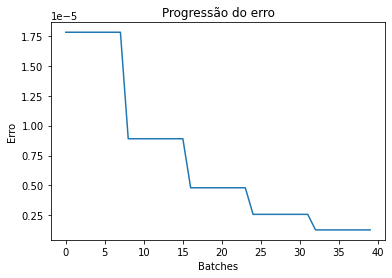

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_erro)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [ ]:
modelo.to_disk('modelo')

## Testes com uma frase

In [ ]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [ ]:
base_teste.head(10)

,Text,Sentiment
2396,idcc .. look idcc perform touch low bband prev...,1
916,wcg everybody look buy ... basement trade w fu...,1
3513,aap fall ready leg,1
2220,znga continue rally,1
2221,gmx -10 ouch,-1
295,"green weekly triangle scc, .... pdate",-1
3202,user know option strike einhorn aap -PRON- cru...,1
3295,aap smile friday eod ast time tim cook talk ap...,-1
5305,merchant ask customer sign card purchase rankl...,-1
1726,wow tv underrated underloved .... look stock p...,1


### Texto positivo

In [ ]:
texto_positivo = base_teste['Text'][2396]
texto_positivo

'idcc .. look idcc perform touch low bband previously'

In [ ]:
previsao = modelo_carregado(texto_positivo)
previsao

idcc .. look idcc perform touch low bband previously

In [ ]:
previsao.cats

{'NEGATIVO': 0.013173994608223438, 'POSITIVO': 0.9866379499435425}

In [ ]:
texto_positivo = 'Apple stock is increasing and I will buy for a good price'
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'apple stock increase buy good price'

In [ ]:
modelo_carregado(texto_positivo).cats

{'NEGATIVO': 0.0032402619253844023, 'POSITIVO': 0.9982023239135742}

### Texto negativo

In [ ]:
texto_negativo = base_teste['Text'][295]
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'NEGATIVO': 0.9764245748519897, 'POSITIVO': 0.038622643798589706}

## Avaliação do modelo

In [ ]:
previsoes = []
for texto in base_teste['Text']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes[0:5]

[{'NEGATIVO': 0.013173994608223438, 'POSITIVO': 0.9866379499435425},
 {'NEGATIVO': 0.22656267881393433, 'POSITIVO': 0.631984531879425},
 {'NEGATIVO': 0.4937252998352051, 'POSITIVO': 0.5115386843681335},
 {'NEGATIVO': 0.00026565976440906525, 'POSITIVO': 0.9975371360778809},
 {'NEGATIVO': 0.685606837272644, 'POSITIVO': 0.6647853255271912}]

In [ ]:
len(previsoes)

1738

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(-1)
previsoes_final = np.array(previsoes_final)

In [ ]:
previsoes_final, np.unique(previsoes_final)

(array([1, 1, 1, ..., 1, 1, 1]), array([-1,  1]))

In [ ]:
respostas_reais = base_teste['Sentiment'].values
respostas_reais

array([ 1,  1,  1, ...,  1, -1,  1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(respostas_reais, previsoes_final)

0.7243958573072498

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[390, 226],
       [253, 869]])

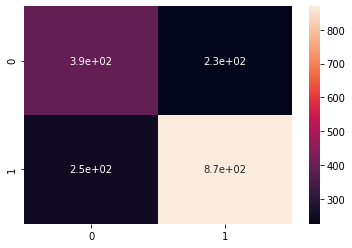

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(respostas_reais, previsoes_final))

              precision    recall  f1-score   support

          -1       0.61      0.63      0.62       616
           1       0.79      0.77      0.78      1122

    accuracy                           0.72      1738
   macro avg       0.70      0.70      0.70      1738
weighted avg       0.73      0.72      0.73      1738

